# Classification model building to predict grant applications success criterian at University of Melbourne.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

This is the first step. It involves the loading of the data from the CSV file using pandas

In [41]:
data_train = pd.read_csv('/Users/MAbdullah/Desktop/machine_learning/Porsche_test_data/train.csv')
#data_train.dtypes
data_train.describe()

,Grant.Status,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,RFCD.Code.4,RFCD.Percentage.4,RFCD.Code.5,...,Dept.No..15,Faculty.No..15,With.PHD.15,Number.of.Successful.Grant.15,Number.of.Unsuccessful.Grant.15,A..15,A.15,B.15,C.15,Unnamed: 251
count,6530.000000,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000,6053.000000,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
mean,0.455896,314733.018668,74.981497,158595.673716,17.575087,93494.786057,6.897076,6987.660003,0.427391,1975.349248,...,3048.0,31.0,NaN,1.0,0.0,13.0,3.0,2.0,NaN,NaN
std,0.498089,51931.329248,26.860727,160662.423052,19.411573,146831.306084,11.763272,46173.886167,3.000918,25188.916498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,210000.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3048.0,31.0,NaN,1.0,0.0,13.0,3.0,2.0,NaN,NaN
25%,0.000000,280204.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3048.0,31.0,NaN,1.0,0.0,13.0,3.0,2.0,NaN,NaN
50%,0.000000,320704.000000,80.000000,230202.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3048.0,31.0,NaN,1.0,0.0,13.0,3.0,2.0,NaN,NaN
75%,1.000000,321201.000000,100.000000,320702.000000,30.000000,270108.000000,10.000000,0.000000,0.000000,0.000000,...,3048.0,31.0,NaN,1.0,0.0,13.0,3.0,2.0,NaN,NaN
max,1.000000,999999.000000,100.000000,440207.000000,90.000000,440207.000000,70.000000,440202.000000,40.000000,419999.000000,...,3048.0,31.0,NaN,1.0,0.0,13.0,3.0,2.0,NaN,NaN


The second step is to remove all those columns which are totally comprised of NaN (not a number).

In [3]:
data_train = data_train.dropna(how ='all', axis ='columns')
#data_train.dtypes

The third step involves the selection of those columns which are around 50-60% empty

In [4]:
data_train = data_train.dropna(thresh=2500, axis='columns')
data_train.shape

(6530, 40)

In [5]:
import matplotlib.pyplot as plt

Plotting all the data which we loaded in the data frame after excluding empty columns and 50-60% empty columns

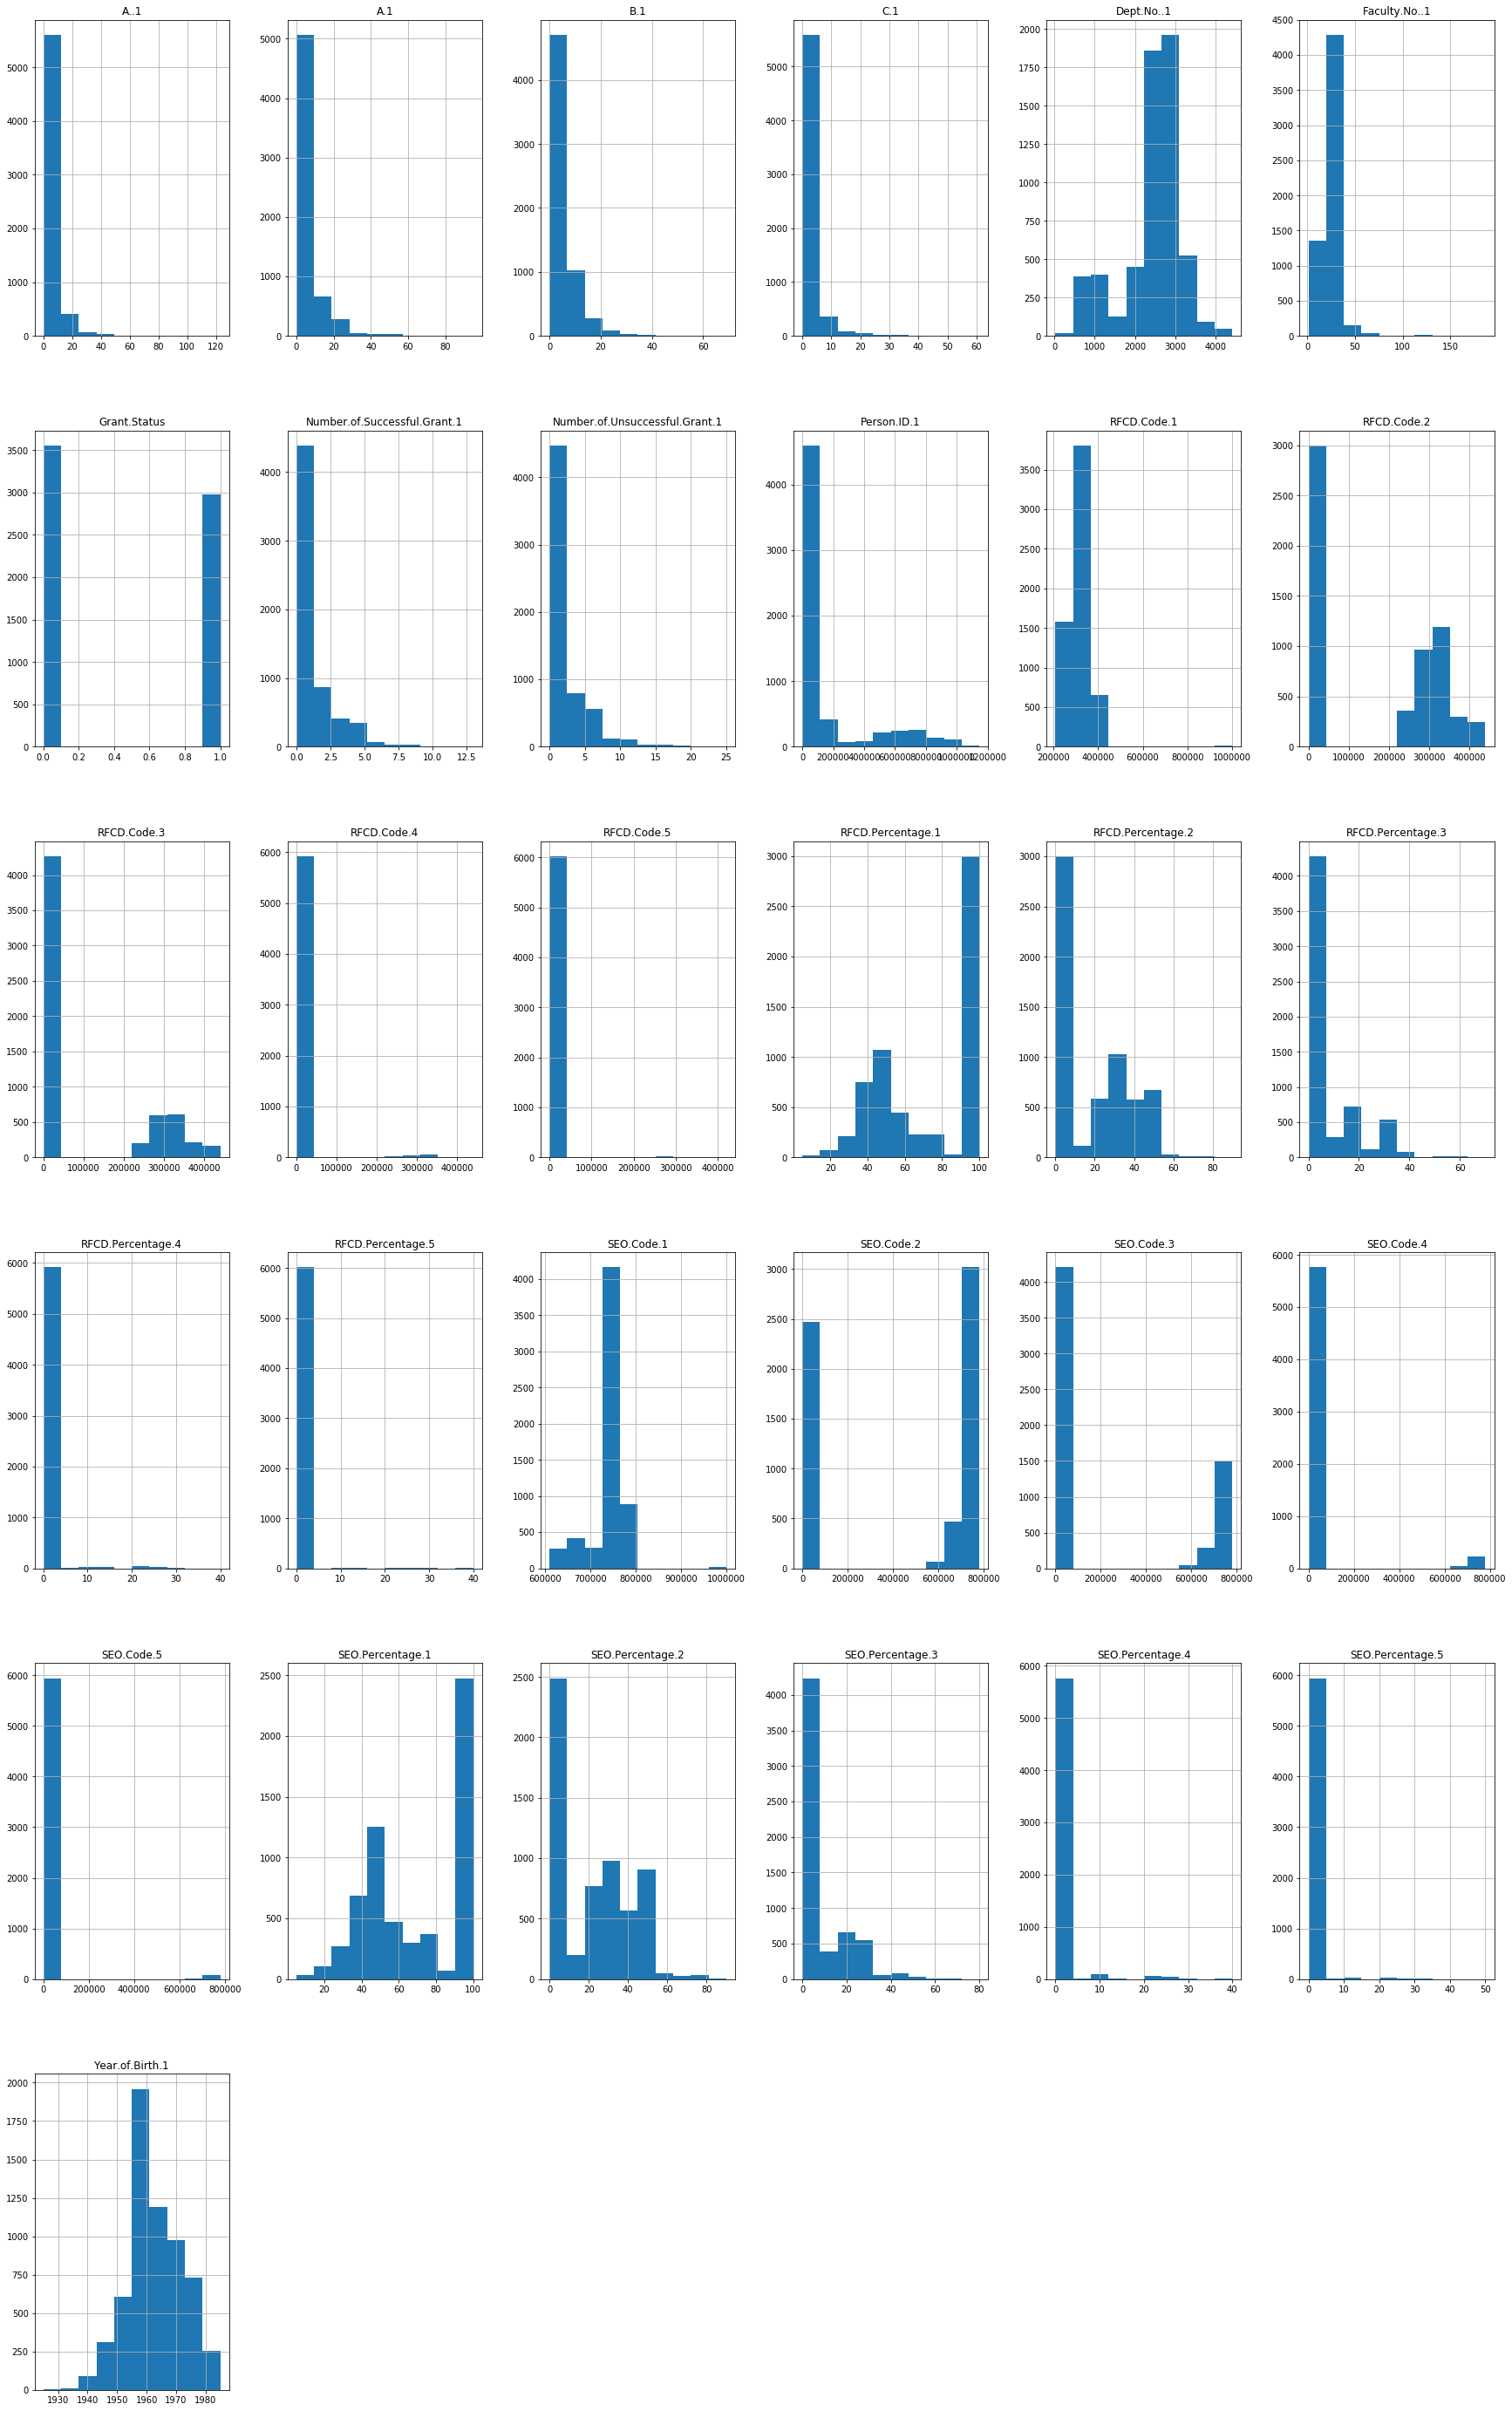

In [6]:
data_train.hist(bins=10, figsize=(30,50))
plt.savefig("histogram_A.1.png")
plt.show()

There were few columns which were not been able to be plotted, the reason because the data type inside is object(string). Therefor we will change the strings to integers and then replace those in the dataframe.

In [7]:
data_train['Role.2'].value_counts()
cleanup_num = { 'Role.2': {'CHIEF_INVESTIGATOR': 1, 'EXT_CHIEF_INVESTIGATOR': 2, 'STUD_CHIEF_INVESTIGATOR': 3, 
                           'DELEGATED_RESEARCHER': 4, 'PRINCIPAL_SUPERVISOR': 5, 'STUDRES': 6, 
                                      'HONVISIT': 7, 'EXTERNAL_ADVISOR':8}}
data_train.replace(cleanup_num, inplace=True)

In [8]:
data_train['Country.of.Birth.1'].value_counts()
cleanup_num = { 'Country.of.Birth.1': {'Australia': 1, 'Asia Pacific': 2, 'Great Britain': 3, 
                           'Western Europe': 4, 'North America': 5, 'Eastern Europe': 6, 
                                      'New Zealand': 7, 'Middle East and Africa':8, 'The Americas':9 ,
                          'South Africa':10}}
data_train.replace(cleanup_num, inplace=True)

In [9]:
data_train['Grant.Category.Code'] = pd.factorize(data_train['Grant.Category.Code'])[0] + 1
data_train['Grant.Category.Code'] = data_train['Grant.Category.Code'].replace(0,np.nan, regex=True)

In [10]:
data_train['Sponsor.Code'] = pd.factorize(data_train['Sponsor.Code'])[0] + 1
data_train['Sponsor.Code'] = data_train['Sponsor.Code'].replace(0,np.nan, regex=True)
data_train['Contract.Value.Band...see.note.A'] = pd.factorize(data_train['Contract.Value.Band...see.note.A'])[0] + 1
data_train['Contract.Value.Band...see.note.A'] = data_train['Contract.Value.Band...see.note.A'].replace(0,np.nan, regex=True)

In [11]:
data_train['Role.1'] = pd.factorize(data_train['Role.1'])[0] + 1
data_train['Role.1'] = data_train['Role.1'].replace(0,np.nan, regex=True)
data_train['No..of.Years.in.Uni.at.Time.of.Grant.1'] = pd.factorize(data_train['No..of.Years.in.Uni.at.Time.of.Grant.1'])[0] + 1
data_train['No..of.Years.in.Uni.at.Time.of.Grant.1'] = data_train['No..of.Years.in.Uni.at.Time.of.Grant.1'].replace(1,np.nan, regex=True)

In [12]:
result = data_train['Grant.Status']
data_train = data_train.drop(['With.PHD.1','Grant.Status','Start.date'],axis=1)

Filling the partially empty cells with the mean values that we calculated from the histograms.

In [13]:
columns_list = data_train.columns
for i in columns_list:
    data_train[i] = data_train[i].fillna(data_train[i].mean().round())

Finding th correlation among the values first and then plotting the correlation matrix

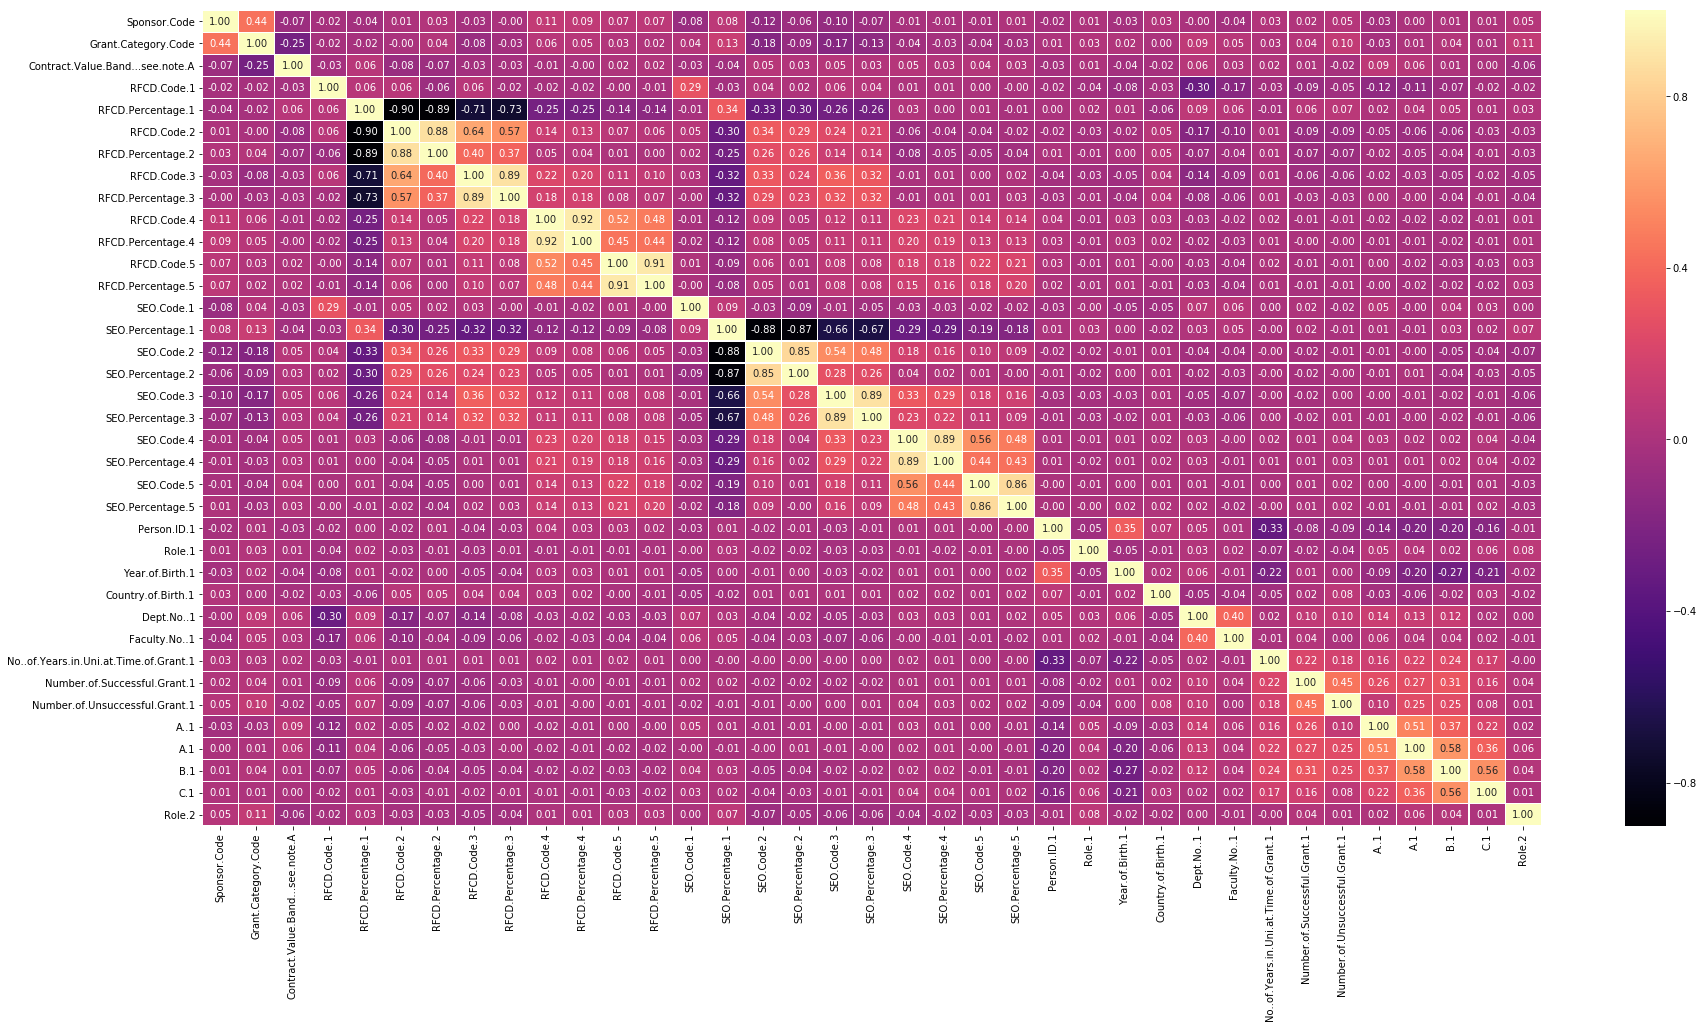

In [14]:
import seaborn as sns
corr = data_train.corr()
fig,ax=plt.subplots(figsize=(30,15))
sns.heatmap(corr,ax=ax,annot=True,linewidths=0.05,fmt='.2f',cmap="magma")
plt.savefig("correlated_heat_map.png")
plt.show()

In [15]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.95:
            if columns[j]:
                columns[j] = False

In [16]:
selected_columns = data_train.columns[columns]
data_final = data_train[selected_columns]
feature_lables = data_train.columns

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train.values, result.values, test_size=0.20)
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc


clf = RandomForestClassifier(n_estimators=200,max_depth=10,random_state=42)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(y_pred)
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)

[0 1 0 ... 1 0 1]
0.9331180594767551


In [43]:
from eli5 import show_prediction as sp
from eli5 import explain_weights_sklearn as ews
ews(clf, feature_names=list(data_train.columns))

Weight,Feature
0.2161 ± 0.1364,Number.of.Unsuccessful.Grant.1
0.1742 ± 0.1275,Contract.Value.Band...see.note.A
0.0866 ± 0.0514,Number.of.Successful.Grant.1
0.0654 ± 0.0721,Sponsor.Code
0.0587 ± 0.0577,Grant.Category.Code
0.0276 ± 0.0209,RFCD.Code.1
0.0272 ± 0.0251,Dept.No..1
0.0256 ± 0.0170,Person.ID.1
0.0251 ± 0.0194,SEO.Code.1
0.0233 ± 0.0169,B.1


In [44]:
sp(clf, data_train.iloc[8], feature_names= list(data_train.columns), top=20,show_feature_values=True)

In [22]:
sp(clf, data_train.iloc[11], feature_names= list(data_train.columns), top=10,show_feature_values=True)

In [21]:
from sklearn.metrics import f1_score
score = f1_score(y_pred, y_test)
print ("Decision Tree F1 score: {:.2f}".format(score))

Decision Tree F1 score: 0.84


In [23]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train,y_train)
y_pred = clf_dtc.predict(X_test)
y_pred_prob = clf_dtc.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.8162396480331263


In [31]:
X_train, X_test, y_train, y_test = train_test_split(data_train.values, result.values, test_size=0.80)
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1306 samples.
Testing set has 5224 samples.


In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.5388591117917305


In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred))

0.998468606431853


In [36]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.5516845329249617, 0.5602986217457887, 0.5449846860643185, 0.5522588055130169, 0.5470903522205207, 0.5541730474732006, 0.5461332312404288, 0.5518759571209801, 0.5499617151607963, 0.5501531393568146, 0.5520673813169985, 0.5511102603369066, 0.5505359877488515, 0.5495788667687596, 0.5459418070444104, 0.5505359877488515, 0.5526416539050536, 0.5493874425727412, 0.5453675344563553, 0.5428790199081164, 0.5449846860643185, 0.5453675344563553, 0.5440275650842267, 0.5430704441041347, 0.5440275650842267]


Text(0, 0.5, 'Testing Accuracy')

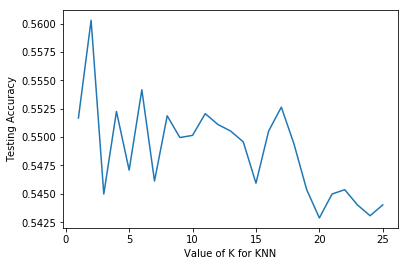

In [37]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [26]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score

# Let us use 5 fold cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [29]:
forest = RandomForestClassifier(random_state=42,class_weight= "balanced", n_jobs=-1)

forest_params = {'max_depth': range(9, 15),
                 'n_estimators': [300, 400, 500],
                 'max_features': ['sqrt', 'log2', None]}


forest_grid = GridSearchCV(forest, forest_params, scoring='roc_auc',
                           cv=skf, n_jobs=-1, verbose=True)

forest_grid.fit(data_final, result)

forest_grid.best_params_, forest_grid.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 11.7min finished


({'max_depth': 14, 'max_features': 'sqrt', 'n_estimators': 300},
 0.9324044458401192)

In [30]:
from sklearn import svm

In [31]:
clf_svm = svm.SVC(kernel='linear') # Linear Kernel
clf_svm.fit(X_train, y_train)
# Model Accuracy: how often is the classifier correct?


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
# Model Precision: what percentage of positive tuples are labeled as such?
y_pred = clf_svm.predict(X_test)
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.4822222222222222
Recall: 0.390990990990991


In [34]:
sp(clf_svm, data_train.iloc[11], feature_names= list(data_train.columns), top=10,show_feature_values=True)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[494 213]
 [362 237]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.63       707
           1       0.53      0.40      0.45       599

   micro avg       0.56      0.56      0.56      1306
   macro avg       0.55      0.55      0.54      1306
weighted avg       0.55      0.56      0.55      1306



In [25]:
clf_svm_rbf = svm.SVC(kernel='rbf')  
clf_svm_rbf.fit(X_train, y_train) 
y_pred = clf_svm_rbf.predict(X_test)   

In [26]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8117647058823529
Recall: 0.2303839732888147


In [27]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[675  32]
 [461 138]]
              precision    recall  f1-score   support

           0       0.59      0.95      0.73       707
           1       0.81      0.23      0.36       599

   micro avg       0.62      0.62      0.62      1306
   macro avg       0.70      0.59      0.55      1306
weighted avg       0.69      0.62      0.56      1306



In [28]:
clf_svm_sigmoid = svm.SVC(kernel='sigmoid')  
clf_svm_sigmoid.fit(X_train, y_train) 
y_pred = clf_svm_sigmoid.predict(X_test)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.0
Recall: 0.0


In [29]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[707   0]
 [599   0]]
              precision    recall  f1-score   support

           0       0.54      1.00      0.70       707
           1       0.00      0.00      0.00       599

   micro avg       0.54      0.54      0.54      1306
   macro avg       0.27      0.50      0.35      1306
weighted avg       0.29      0.54      0.38      1306



In [35]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf_logistic = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train,y_train)

In [38]:
y_pred = clf_logistic.predict(X_test)
y_pred_prob = clf_logistic.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = roc_curve(y_true=y_test, y_score=y_pred_prob)
roc_auc = auc(fpr, tpr)


In [39]:
print(roc_auc)

0.552490972996965


In [45]:
sp(clf_logistic, data_train.iloc[8], feature_names= list(data_train.columns), top=20,show_feature_values=True)